In [128]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Carregar o conjunto de dados
df = pd.read_csv('../../Processados/heart_final.csv')
df.head()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [129]:
# Separar x e y
X = df.drop(columns=['target'])
y = df['target']


## Técnica de reamostragem: Stratified K-Fold Cross Validation

O uso de K-fold Cross Validation é crucial em conjuntos de dados desbalanceados para garantir uma avaliação robusta e não enviesada do modelo. Como uma das classes apresenta a proporção de 0.54276315789, mesmo que a diferença é pouca achamos necessário manter a proporção para que a amostragem de treinamento possa ser o mais parecido possivel com o dataset. 

In [130]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=958)

# Exemplo de uso
print("Proporção de pessoas com doença no datset:", y.mean())
print("Proporção de pessoas com doença nos dados de treino:", y_train.mean())
print("Proporção de pessoas com doença nos dados de teste:", y_test.mean())

Proporção de pessoas com doença no datset: 0.543046357615894
Proporção de pessoas com doença nos dados de treino: 0.5414364640883977
Proporção de pessoas com doença nos dados de teste: 0.5454545454545454


## Parametros utilizados pela arvore

- ### criterion='entropy'
O critério de entropia é utilizado para medir a impureza de uma divisão em uma árvore de decisão. Em termos de árvores de decisão, uma divisão com menor entropia significa que os nós resultantes são mais homogêneos em relação à variável alvo.

- ### max_depth=4
Limitar a profundidade da árvore é uma técnica de regularização que visa prevenir o overfitting.

In [131]:
# Criar o classificador de árvore de decisão
clf = DecisionTreeClassifier(criterion='entropy',  max_depth=4,random_state=958)

# Treinar o modelo
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=958)

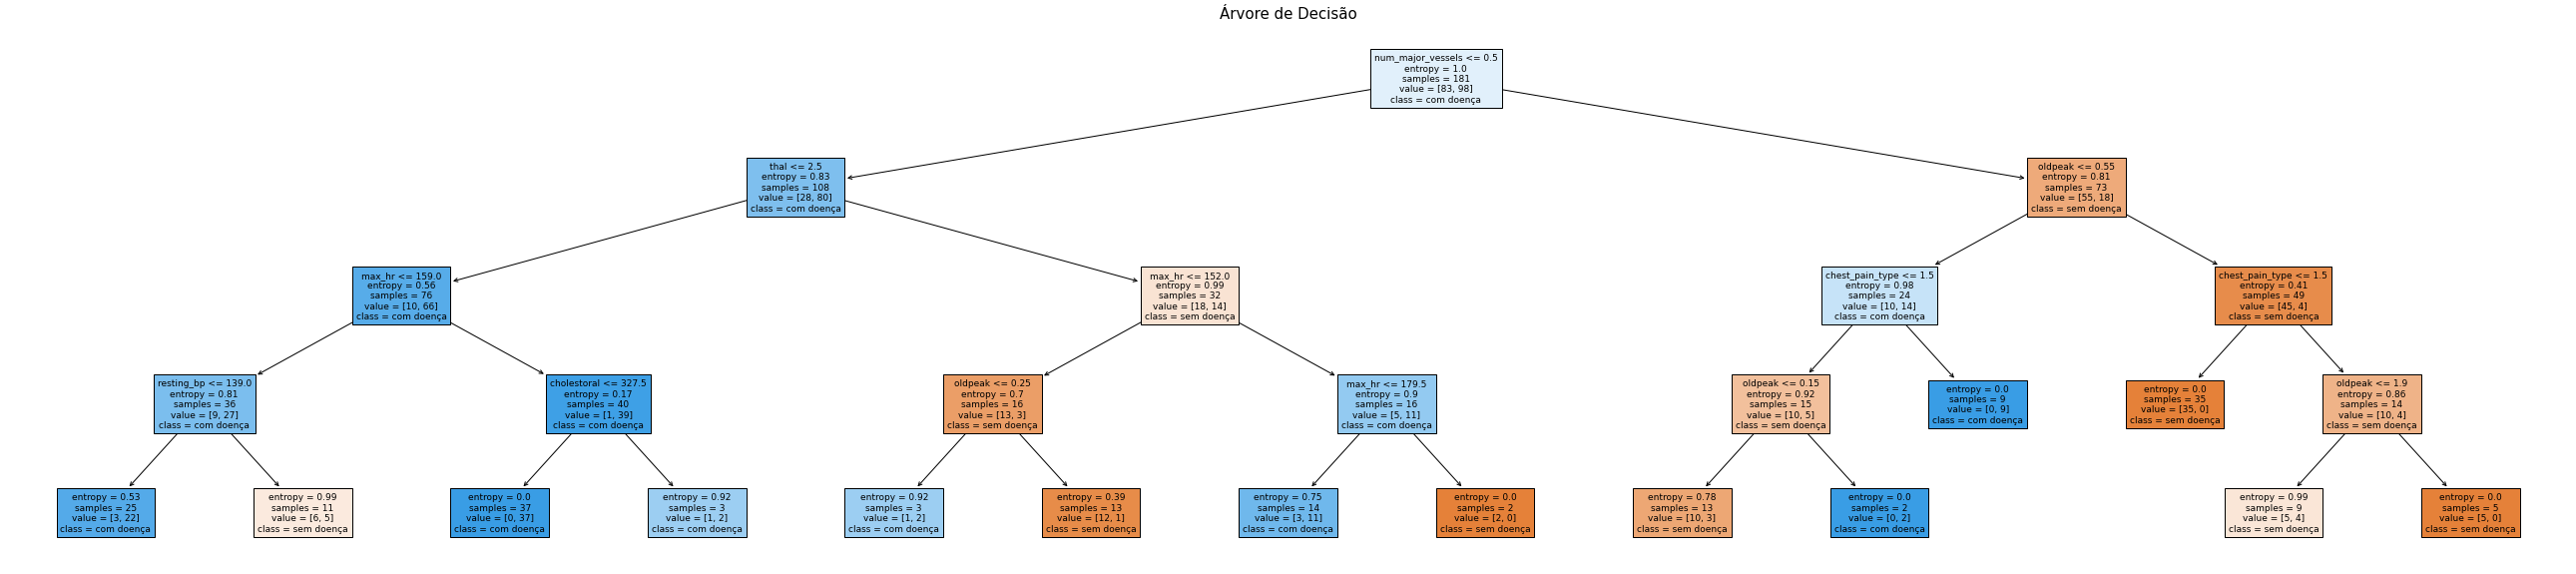

In [132]:
plt.figure(figsize=(46, 10))  # Tamanho da figura
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['sem doença', 'com doença'],  fontsize=9, precision=2)
plt.title("Árvore de Decisão", fontsize=15)  # Título da árvore
plt.savefig('arvore_decisao.png', format='png', dpi=300)  
plt.show()

In [133]:
# Previsões nos dados de treino e teste
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)


print(f'Acurácia nos dados de treino: {accuracy_score(y_train, y_train_pred)}')
print(f'Acurácia nos dados de teste:  {accuracy_score(y_test, y_test_pred)}')


Acurácia nos dados de treino: 0.8839779005524862
Acurácia nos dados de teste:  0.7603305785123967


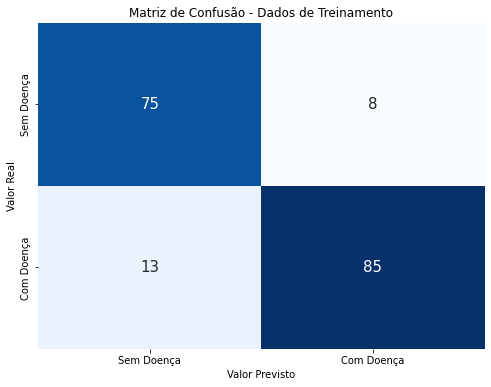

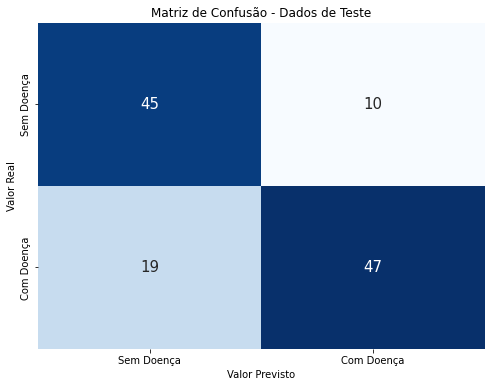

In [134]:
#Função para plotar a matrz de confusão
def plot_confusion_matrix(y_real, y_previsto, title):
    
    # Calcular
    cm = confusion_matrix(y_real, y_previsto)

    # Plotar
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False,
                annot_kws={'fontsize': 15}, 
                xticklabels=['Sem Doença', 'Com Doença'],
                yticklabels=['Sem Doença', 'Com Doença'])
    plt.xlabel('Valor Previsto')
    plt.ylabel('Valor Real')
    plt.title(title)
    plt.savefig(title+'.png', format='png', dpi=400)
    plt.show()


plot_confusion_matrix(y_train, y_train_pred, 'Matriz de Confusão - Dados de Treinamento')
plot_confusion_matrix(y_test, y_test_pred, 'Matriz de Confusão - Dados de Teste')


In [135]:

# # Dividir os dados em treino, validação e teste com estratificação
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# # Construir a árvore de decisão completa
# clf = DecisionTreeClassifier(random_state=958)
# clf.fit(X_train, y_train)

# # Função para realizar a poda por redução de erro
# def prune_tree(clf, X_val, y_val):
#     path = clf.cost_complexity_pruning_path(X_train, y_train)
#     ccp_alphas = path.ccp_alphas

#     best_clf = clf
#     best_score = accuracy_score(y_val, clf.predict(X_val))

#     for ccp_alpha in ccp_alphas:
#         temp_clf = DecisionTreeClassifier(random_state=958, ccp_alpha=ccp_alpha)
#         temp_clf.fit(X_train, y_train)
#         temp_score = accuracy_score(y_val, temp_clf.predict(X_val))
#         if temp_score >= best_score:
#             best_clf = temp_clf
#             best_score = temp_score

#     return best_clf

# # Realizar a poda por redução de erro
# pruned_clf = prune_tree(clf, X_val, y_val)

# # Avaliar o desempenho da árvore podada
# train_accuracy = accuracy_score(y_train, pruned_clf.predict(X_train))
# test_accuracy = accuracy_score(y_test, pruned_clf.predict(X_test))

# print(f'Acurácia nos dados de treino (árvore podada): {train_accuracy:.2f}')
# print(f'Acurácia nos dados de teste (árvore podada): {test_accuracy:.2f}')

# # Função para plotar a matriz de confusão
# def plot_confusion_matrix(y_true, y_pred, classes, title='Matriz de Confusão', cmap=plt.cm.Blues):
#     cm = confusion_matrix(y_true, y_pred)
#     plt.figure(figsize=(6, 6))
#     sns.heatmap(cm, annot=True, cmap=cmap, fmt='d', cbar=False,
#                 annot_kws={'fontsize': 15}, 
#                 xticklabels=classes,
#                 yticklabels=classes)
#     plt.xlabel('Valor Previsto')
#     plt.ylabel('Valor Real')
#     plt.title(title)
#     plt.show()

# # Plotar matriz de confusão para dados de treino
# plot_confusion_matrix(y_train, pruned_clf.predict(X_train), classes=['Sem Doença', 'Com Doença'], title='Matriz de Confusão - Dados de Treino')

# # Plotar matriz de confusão para dados de teste
# plot_confusion_matrix(y_test, pruned_clf.predict(X_test), classes=['Sem Doença', 'Com Doença'], title='Matriz de Confusão - Dados de Teste')

# # Visualizar a melhor árvore podada
# plt.figure(figsize=(20, 10))
# plot_tree(pruned_clf, filled=True, feature_names=X.columns, class_names=['Sem Doença', 'Com Doença'], rounded=True)
# plt.show()